<h2 align='center'>FINAL PROJECT OF ADVANCED STATISTICS FOR PHYSICS ANALYSIS</h2>

<h1 align='center'>NAIVE BAYES CLASSIFIER FOR FAKE NEWS RECOGNITION</h1>

<h3 align='center'>Lorenzo Valentini</h3>

## Table of contents: <a class="anchor" id="index"></a>
- [Introduction](#Introduction)
- [Naive Bayes](#Naive_Bayes)
- [Data](#Data)
- [Algorithm](#Algorithm)
    - [Preprocessing - Stemming](#Preprocessing)
    - [Features generation](#Features_generation)
    - [Classifier](#Classifier)
    - [Prediction](#Prediction)
- [Single words](#Single_words)
- [Higher order n-grams](#n-grams)
- [Sentiment analysis](#Sentiment)
- [Punctuation + higher order n-grams](#P+n-grams)
- [Comparisons](#Comparisons)
- [Binomial classifier](#P+n-grams)



## [Introduction](#index) <a class="anchor" id="Introduction"></a>

Naive Bayes classifiers are powerful algorithms that are used for text data analysis and are connected to classification tasks of text in multiple classes.

The goal of the project is to implement a Multinomial Naive Bayes classifier in R and test its performances in the classification of social media posts, in particular tweets. The classifier implemented has to detect fake news, determining the level of reliability of the tweets.

## [Naive Bayes](#index) <a class="anchor" id="Naive_Bayes"></a>

Naive Bayes is a simple technique for constructing classifiers. This model assigns class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable.
For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.
it is mostly used for text data analysis and is connected to classification tasks of text in multiple classes.

The crux of this probabilistic machine learning model is based on the Bayes theorem: 

$$P(A|B,I)=\frac{P(B|A,I)P(A|I)}{P(B|I)}$$

In this project A is label for each news and B is set of words in that news.
$$B=(b_{1},b_{2},...,b_{n})$$
using chain rule and we will have: 
$$P(A|b_{1},b_{2},...,b_{n},I)=\frac{P(b_{1}|A,I)P(b_{2}|A,I)...P(b_{n}|A,I)P(A|I)}{P(b_{1}|I)P(b_{2}|I)...P(b_{n}|I)}$$

For all entries, the denominator does not change, it remain static. Therefore, the denominator can be removed and a proportionality can be introduced.

$$P(A|b_{1},b_{2},...,b_{n},I)\propto P(A|I)\prod_{i=1}^{n}P(b_{i}|A)$$

Finally, we need to find the class A with maximum probability:
$$A = argmax P(A|I)\prod_{i=1}^{n}P(b_{i}|A)$$

#### More detail on Algorithm
prepared train dataset is a matrix of all possible words as column names and and thier frequencies in each news.

example 1:

| label | abort | absolut | abus |accept | access | accid
| --- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 0 | 3 | 0 | 0 | 1 |
| 1 | 1 | 1 | 5 | 0 | 1 | 2 |
| 2 | 2 | 0 | 0 | 0 | 0 | 1 |
| 1 | 0 | 0 | 2 | 0 | 1 | 0 |

To build the model, we grouped data by labels and sum their words' frequencies. By normalizing them to the total sum in each group, we find the probability of each world in that label ($P(b_{i}|A)$). we also calculate $P(A|I)$ by finding the ratio of the number of each label to their total number.

example 2:

| label_prob | label | abort | absolut | abus |accept | access | accid|
|---| --- | --- | --- | --- | --- | --- | --- |
| 0.2 | 0 | 0.01 | 0 | 0.3 | 0 | 0.5 | 0.001 |
| 0.19 | 1 | 0 | 0.004 | 0.02 | 0.1 | 0 | 0.003 |
| 0.18 | 2 | 0.04 | 0.09 | 0.01 | 0 | 0| 0 |
| 0.21 | 3 | 0 | 0.1 | 0.04 | 0.65 | 0.002 | 0.04 |
| 0.23 | 4 | 0 | 0 | 0.2 | 0.16 | 0.87 | 0.002 |
| 0.17 | 5 | 0.01 | 0 | 0 | 0.19 | 0.4 | 0.3 |



The resulting data frame can be used as a model. In the next step, it will be used to determine prior and likelihood.

The test dataset will be prepared the same as the train set. For each news, there are some words and their frequencies. we should calculate:


$$P(A|I)\prod_{\text{all words of news}}(P(b_{i}|A))^{\text{it's frequncy in test news}}$$

now we just need find which label has the the maximum probabilty.


$\textbf{Notice:}$
As it is mentioned, in the train set, each word's frequency is determined. if the frequency of a word in one label is zero the probability of that in the model data frame will be zero ($P(b_{i}|A)=0$). so in the calculation of test news when it contains that word, the final probability for that label will be zero, even if other words' probability is high. this cause the label is not chosen for the wrong reason.
to solve this problem, we add 1 to all frequencies in the train data set and we won't have any zero probability for words in test news.

example of the problem:

if one news contains "abort" and "abus", according to tabel in example 2, $p(\text{"abort"}|label_0) = 0$ , to classify this news no matter how $p(\text{"abus"}|label_0)$ is bigger than other labels, $P(lable_0) = 0 $



## [Data](#index) <a class="anchor" id="Data"></a>

For the implementation of the classifier the Kaggle dataset has been used. It consists of a training set with 10,240 labelled instances and a test set wth 1,267 unlabelled instances (not used in this project).

The labels used for classifying the text are identified by the following numbers in the dataset.

| Labels         | Values |
|----------------|:-----:|
| True           | 5     |
| Mostly True    | 3     |
| Half True      | 2     |
| Barely True    | 0     |
| False          | 1     |
| Not Known      | 4     |

In [1]:
library(magrittr)
library(tidytext)
library(stringr)
library(syuzhet)
library(caret)
library(dplyr)
library(quanteda)
library(Matrix.utils)
library(SnowballC)
library(RColorBrewer)
library(textstem)
library(tidyverse)
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Package version: 3.2.3
Unicode version: 14.0
ICU version: 71.1

Parallel computing: 8 of 8 threads used.

See https://quanteda.io for tutorials and examples.

Loading required package: Matrix

Loading required package: koRpus.lang.en

Loading required package: koRpus

Loading required package: sylly

For information on available language packages for 'koRpus', run

  available.koRpus.lang()

and see ?install.koRpus.lang()



Attaching package: ‘koRpus’


The following objects are masked from ‘package:quanteda’:

    tokens, types


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.2     
── Conflicts ────

In [2]:
labelled_set_raw <- read.csv('./fake_news_db/train.csv')

if(FALSE){unlabelled_set_raw <- read.csv('./fake_news_db/test.csv')
    print(summary(unlabelled_set_raw))
    anyNA(unlabelled_set_raw)}

anyNA(labelled_set_raw)

head(labelled_set_raw)

[1] FALSE

,Labels,Text,Text_Tag
,<int>,<chr>,<chr>
1,1,Says the Annies List political group supports third-trimester abortions on demand.,abortion
2,2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments"
3,3,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy
4,1,Health care reform legislation is likely to mandate free sex change surgeries.,health-care
5,2,The economic turnaround started at the end of my term.,"economy,jobs"
6,5,The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.,education


## [Algorithm](#index) <a class="anchor" id="Algorithm"></a>

### [Preprocessing - Stemming](#index) <a class="anchor" id="Preprocessing"></a>

Before being used, the tweets have to be  

stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form. The stem need not be identical to the morphological root of the word; it is usually sufficient that related words map to the same stem, even if this stem is not in itself a valid root.

In [3]:
stemming <- function(raw_set){
    set <- unnest_tokens(
      tbl = raw_set,
      output = "words",
      input = "Text",
      token = "words",
      format = c("text", "man", "latex", "html", "xml"),
      to_lower = TRUE,
      drop = FALSE,
      collapse = NULL
    )
    set <- mutate(set, word_stem = wordStem(words, language="english"))
    set <- set %>% group_by(Text)  %>%
                        dplyr::summarise(doc_id = paste(word_stem, collapse = " "))
    set <- merge(raw_set, set, by='Text')
    return (set)}

In [4]:
labelled_set_stemmed <- stemming(labelled_set_raw)
head(labelled_set_stemmed)

,Text,Labels,Text_Tag,doc_id
,<chr>,<int>,<chr>,<chr>
1,... study after study has shown that the death penalty deters murders.,2,crime,studi after studi has shown that the death penalti deter murder
2,"...Over 30 years, federal spending on education has grown by 375 percent, but test scores remain flat.",3,"education,federal-budget",over 30 year feder spend on educ has grown by 375 percent but test score remain flat
3,"...some of those (tax increases) were either court-ordered, or they were voted on by the people and approved by the people for (such) things as roads.",2,taxes,some of those tax increas were either court order or they were vote on by the peopl and approv by the peopl for such thing as road
4,''I have received more contributions than any other candidate in the race Republican or Democrat.'',1,elections,i have receiv more contribut than ani other candid in the race republican or democrat
5,(After the auto bailout) General Motors is back on top as the worlds No. 1 automaker.,2,"economy,jobs",after the auto bailout general motor is back on top as the world no 1 automak
6,"(Big banks) have invested over $300,000 in (Joe Heck), and Heck has sponsored $44 million dollars in tax breaks for banks.",0,campaign-finance,"big bank have invest over 300,000 in joe heck and heck has sponsor 44 million dollar in tax break for bank"


### [Features generation](#index) <a class="anchor" id="Features_generation"></a>


In [5]:
feature_generation <- function(set, emotion = TRUE, punctuation = TRUE, ngrams = TRUE, highest_gram, minimum_frequencies, toocommon){
    
    if(emotion){
        detected_emotions <- get_nrc_sentiment(set$Text, cl = NULL, language = "english", lowercase = TRUE)
        set <- cbind(set, detected_emotions)
    }
    
    if(punctuation){
        set$length <- nchar(set$Text)
        set$esclam_mark <- str_count(set$Text, "!")
        set$commas <- str_count(set$Text, ",")
        set$two_points <- str_count(set$Text, ":")
        set$semicolon <- str_count(set$Text, ";")        
    }
    
    if(ngrams){
        set <- make_extended_dfm(set, highest_gram, minimum_frequencies, toocommon)
    }
    
    set[is.na(set)] <- 0

    return(set)}

#-----------------------------------------------------------------------------------------------------------------------------------------

gram_sparse_create <- function(dataset, rarity, toocommon){
    tidy_tweets1 <- unnest_tokens(dataset, "term", "doc_id", token = "words", drop = FALSE)
    tidy_tweets1 <- tidy_tweets1 %>% dplyr::count(Labels, doc_id, term) %>% filter(!(term %in% too_common))
    too_rare <- (tidy_tweets1 %>% dplyr::count(term) %>% filter(!(term %in% too_common)) %>% filter(n < rarity))$term
    tidy_tweets1 <- tidy_tweets1 %>% dplyr::count(Labels, doc_id, term) %>% filter(!(term %in% too_common)) %>% filter(!(term %in% too_rare))
    cast_tweets1 <- tidy_tweets1 %>% cast_dfm(doc_id, term, n) %>% convert(to = "data.frame")
    return(cast_tweets1)
}

#-----------------------------------------------------------------------------------------------------------------------------------------

ngram_sparse_create <- function(dataset, nn, rarity){
    tidy_tweetsn <- unnest_tokens(dataset, "term", "doc_id", token = "ngrams", n = nn, drop = FALSE)
    tidy_tweetsn <- tidy_tweetsn %>% dplyr::count(Labels, doc_id, term) #%>% filter(!(term %in% too_common))
    too_raren <- (tidy_tweetsn %>% dplyr::count(term) %>% filter(n < rarity))$term #%>% filter(!(term %in% too_common)) 
    tidy_tweetsn <- tidy_tweetsn %>% dplyr::count(Labels, doc_id, term) %>% filter(!(term %in% too_raren)) #%>% filter(!(term %in% too_common))
    cast_tweetsn <- tidy_tweetsn %>% cast_dfm(doc_id, term, n) %>% convert(to = "data.frame") 
    return(cast_tweetsn)
}

#-----------------------------------------------------------------------------------------------------------------------------------------

make_extended_dfm <- function(dframe, highest_gram, minimum_frequencies, toocommon){
    dfm <- merge(x = dframe, 
                y = gram_sparse_create(dframe, minimum_frequencies[1], toocommon),
                by = "doc_id", 
                all = TRUE)
    for (i in 2:highest_gram) {
        dfm <- merge(x = dfm, 
                     y = ngram_sparse_create(dframe, i, minimum_frequencies[i]),
                     by = "doc_id", 
                     all = TRUE)
    }
    return(dfm)
 }

In [6]:
too_common <- c("in", "the", "of", "to", "a", "and", "they", "or", "for", "that", "says", "we", 
             "more", "at", "be", "about", "will", "one", "an", "his", "you", "their", "is", 
             "on", "has", "have", "are", "was", "by", "it", "from", "with", "as", "not", "our", 
             "I", "this", "he", "been", "NA")


labelled_set <- feature_generation(labelled_set_stemmed, emotion = FALSE, punctuation = TRUE, ngrams = TRUE, highest_gram = 7, minimum_frequencies = c(5, 5, 4, 3, 3, 3, 3), toocommon = toocommon)
labelled_set <- labelled_set[!is.na(colnames(labelled_set))]
head(labelled_set)

Warning message in merge.data.frame(x = dfm, y = ngram_sparse_create(dframe, i, :
“column names ‘NA.x’, ‘NA.y’ are duplicated in the result”
Warning message in merge.data.frame(x = dfm, y = ngram_sparse_create(dframe, i, :
“column names ‘NA.x’, ‘NA.y’ are duplicated in the result”


,doc_id,Text,Labels,Text_Tag,length,esclam_mark,commas,two_points,semicolon,1,⋯,the highest corpor tax rate in the,almost as much wealth as the bottom,as much wealth as the bottom 90,much wealth as the bottom 90 percent,own almost as much wealth as the,are open serv in the u congress,are socialist who are open serv in,socialist who are open serv in the,who are open serv in the u,under the new health care law the
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1 3 of our kid drop out of high school cannot go to colleg or start a career,"1/3 of our kids drop out (of high school), cannot go to college or start a career.",0,"corrections-and-updates,education",82,0,1,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
2,1 in 4 rhode island under the age of 65 doe not have health insur,1 in 4 Rhode Islanders under the age of 65 does not have health insurance.,2,health-care,74,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
3,1 percent of candid that the nation rifl associ endors in 2012 won,1 percent of candidates that (the National Rifle Association) endorsed in 2012 won.,1,"campaign-finance,guns,pundits",83,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
4,1.3 million peopl in america make their live off ebay,1.3-million people in America make their living off eBay.,1,economy,57,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1.53 million job are at risk from potenti defens cut,1.53 million jobs are at risk (from potential defense cuts).,3,"deficit,jobs,message-machine-2012,military",60,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,10 cent on thedollar from the clinton foundat goe to charit caus,10 cents on thedollar from the Clinton Foundation goes to charitable causes.,1,candidates-biography,76,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Training set:


,doc_id,Text,Labels,Text_Tag,length,esclam_mark,commas,two_points,semicolon,1,⋯,the highest corpor tax rate in the,almost as much wealth as the bottom,as much wealth as the bottom 90,much wealth as the bottom 90 percent,own almost as much wealth as the,are open serv in the u congress,are socialist who are open serv in,socialist who are open serv in the,who are open serv in the u,under the new health care law the
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1 3 of our kid drop out of high school cannot go to colleg or start a career,"1/3 of our kids drop out (of high school), cannot go to college or start a career.",0,"corrections-and-updates,education",82,0,1,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
2,1 in 4 rhode island under the age of 65 doe not have health insur,1 in 4 Rhode Islanders under the age of 65 does not have health insurance.,2,health-care,74,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
3,1 percent of candid that the nation rifl associ endors in 2012 won,1 percent of candidates that (the National Rifle Association) endorsed in 2012 won.,1,"campaign-finance,guns,pundits",83,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
4,1.3 million peopl in america make their live off ebay,1.3-million people in America make their living off eBay.,1,economy,57,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1.53 million job are at risk from potenti defens cut,1.53 million jobs are at risk (from potential defense cuts).,3,"deficit,jobs,message-machine-2012,military",60,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,10 cent on thedollar from the clinton foundat goe to charit caus,10 cents on thedollar from the Clinton Foundation goes to charitable causes.,1,candidates-biography,76,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0



Test set:


,doc_id,Text,Labels,Text_Tag,length,esclam_mark,commas,two_points,semicolon,1,⋯,the highest corpor tax rate in the,almost as much wealth as the bottom,as much wealth as the bottom 90,much wealth as the bottom 90 percent,own almost as much wealth as the,are open serv in the u congress,are socialist who are open serv in,socialist who are open serv in the,who are open serv in the u,under the new health care law the
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8193,the media wide overlook comment made by former presid bill clinton that hillari clinton had a terribl concuss that took six month to recov from,The media widely overlooked comments made by former President Bill Clinton that Hillary Clinton had a terrible concussion that took six months to recover from.,1,candidates-biography,159,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8194,the media wont publish a real photo of trayvon martin with tattoo on his face,The media wont publish a real photo of Trayvon Martin with tattoos on his face.,4,crime,79,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8195,the median incom in this countri has declin 10 percent in the last four year,The median income in this country has declined 10 percent in the last four years.,2,economy,81,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8196,the median male worker in this countri has not seen a rais inflat adjust for 30 year basic,"The median male worker in this country has not seen a raise, inflation adjusted, for 30 years, basically.",3,"economy,jobs,labor,workers",105,0,3,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8197,"the median net worth of american household hasnt chang much over the past decad it about 20,000 but congress averag median net worth has balloon more than doubl","The median net worth of American households hasnt changed much over the past decades, its about $20,000 ... but Congress average median net worth has ballooned, more than doubled.",2,"congress,wealth",179,0,3,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8198,the medic marijuana ballot initi doesnt requir a physician write a prescript and can be for condit like have a back that need to be scratch,The medical marijuana ballot initiative doesnt require a physician writing a prescription and can be for conditions like having a back that needs to be scratched.,2,"florida-amendments,health-care,marijuana",162,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


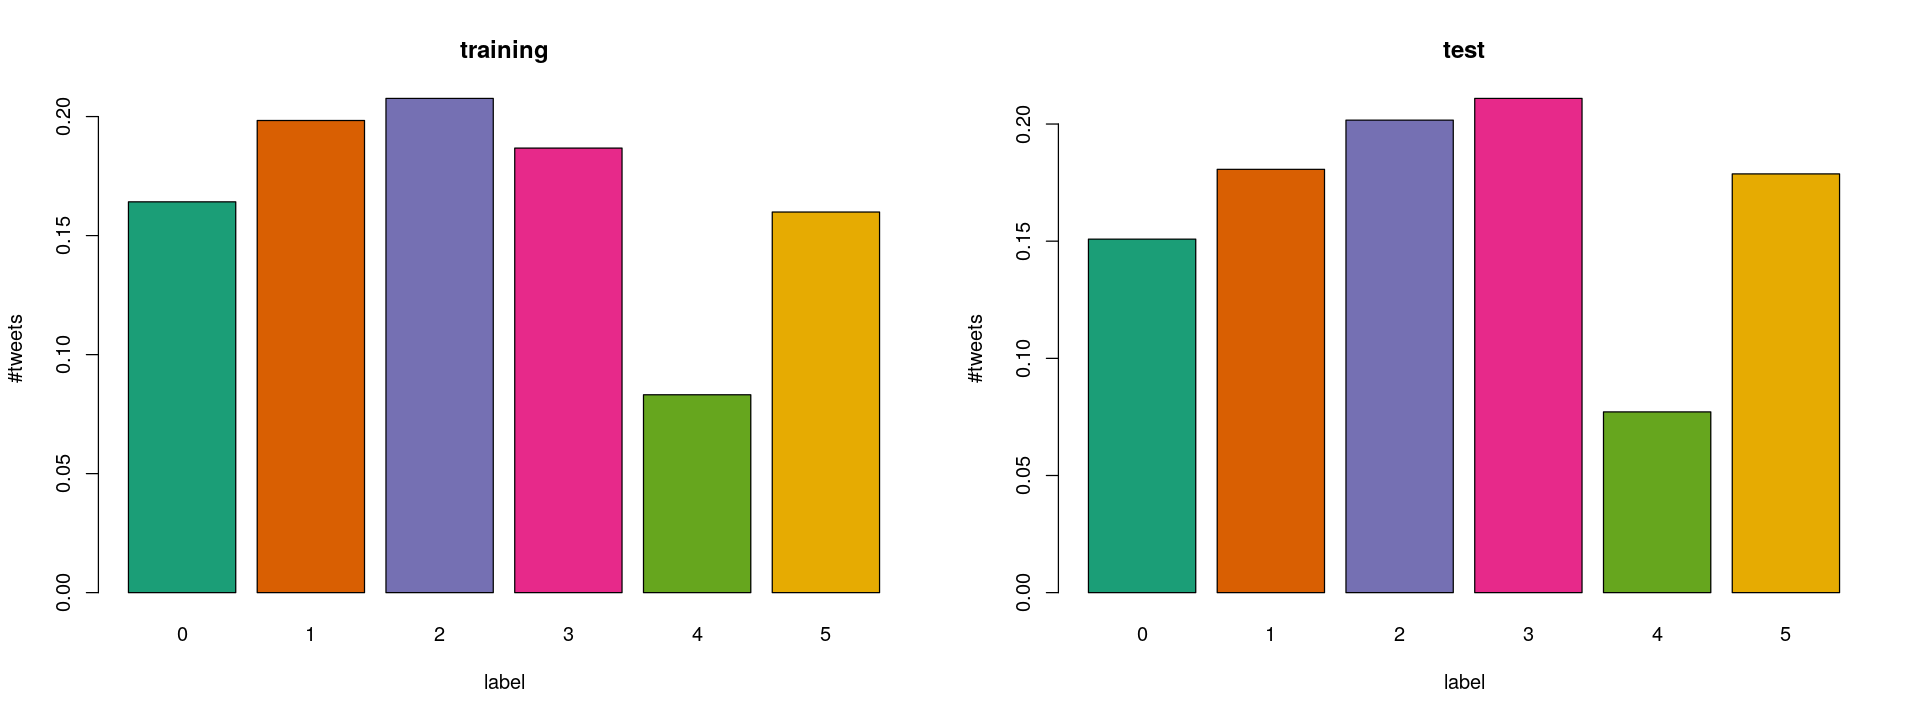

In [7]:
N <- nrow(labelled_set)
train_fraction <- 0.8
limit <- N*train_fraction
train_set <- labelled_set[1:limit,]
test_set <- labelled_set[(1+limit):N,]
cat("Training set:\n")
head(train_set)
cat("\nTest set:\n")
head(test_set)


fig(16, 6)
par(mfrow = c(1, 2))

dataset <- list(training = train_set, test = test_set)
for (i in 1:2) {
    label_freq <- summarise(group_by(dataset[[i]], Labels), counts = length(Labels))
    barplot(label_freq[[2]]/sum(label_freq[[2]]), names.arg = label_freq[[1]], col = brewer.pal(max(c(8, 2)), 'Dark2'), main = names(dataset)[i], xlab = 'label', ylab = '#tweets')
}

### [Classifier](#index) <a class="anchor" id="Classifier"></a>


In [6]:
classifier_assemble <- function(dfm){
    df_probabilities <- aggregate(.~Labels, 
                      data = dfm[, -which(names(dfm) == "Text" | names(dfm) == "Text_Tag" | names(dfm) == "doc_id")], 
                      FUN = sum)
    
    df_probabilities <- df_probabilities + 1
    df_probabilities$Labels <- df_probabilities$Labels - 1
    label_densities <- dfm %>% group_by(Labels) %>% summarize(counts = n_distinct(doc_id))
    label_densities$counts <- label_densities$counts/sum(label_densities$counts)
    df_probabilities$label_densities <- label_densities$counts
    df_probabilities$total.num <- rowSums(df_probabilities[, -which(names(df_probabilities) == "Labels" | names(df_probabilities) == "label_densities" )]) 
    
    df_probabilities[, -which(names(df_probabilities) == "Labels" | names(df_probabilities) == "label_densities" | names(df_probabilities) == "total.num")] <- df_probabilities[, -which(names(df_probabilities) == "Labels" | names(df_probabilities) == "label_densities" | names(df_probabilities) == "total.num")]/df_probabilities$total.num #loop on 5 indexes

    df_probabilities %>% select(-matches('^$'))
    return(df_probabilities)
}

In [9]:
df_probabilities <- classifier_assemble(train_set)
df_probabilities

Labels,length,esclam_mark,commas,two_points,semicolon,1,3,cannot,career,⋯,as much wealth as the bottom 90,much wealth as the bottom 90 percent,own almost as much wealth as the,are open serv in the u congress,are socialist who are open serv in,socialist who are open serv in the,who are open serv in the u,under the new health care law the,label_densities,total.num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.7708854,5.292798e-05,0.004488292,9.527036e-05,3.175679e-05,0.0001270271,3.704958e-05,3.175679e-05,4.234238e-05,⋯,5.292798e-06,5.292798e-06,5.292798e-06,5.292798e-06,5.292798e-06,5.292798e-06,5.292798e-06,5.292798e-06,0.16442543,188936
1,0.7763940,8.174492e-05,0.003760266,9.617049e-05,1.442557e-05,0.0001298302,5.770229e-05,9.617049e-06,1.923410e-05,⋯,4.808525e-06,4.808525e-06,4.808525e-06,4.808525e-06,4.808525e-06,4.808525e-06,4.808525e-06,4.808525e-06,0.19767726,207964
2,0.7817450,4.142090e-05,0.004655709,2.899463e-05,1.242627e-05,0.0001822520,6.213135e-05,1.656836e-05,3.313672e-05,⋯,4.142090e-06,4.142090e-06,4.142090e-06,4.142090e-06,4.142090e-06,4.142090e-06,4.142090e-06,4.142090e-06,0.20770171,241424
3,0.7758462,2.776300e-05,0.004844643,7.866182e-05,5.089883e-05,0.0001989681,5.552599e-05,1.850866e-05,2.313583e-05,⋯,4.627166e-06,4.627166e-06,4.627166e-06,4.627166e-06,4.627166e-06,4.627166e-06,4.627166e-06,4.627166e-06,0.18704156,216115
4,0.7214905,1.352392e-04,0.003807503,1.664482e-04,3.120904e-05,0.0001144331,4.161205e-05,3.120904e-05,1.040301e-05,⋯,1.040301e-05,1.040301e-05,1.040301e-05,4.161205e-05,4.161205e-05,4.161205e-05,4.161205e-05,2.080603e-05,0.08325183,96126
5,0.7666484,6.099826e-05,0.004003704,7.763415e-05,5.545297e-06,0.0001663589,4.436237e-05,1.663589e-05,1.109059e-05,⋯,5.545297e-06,5.545297e-06,5.545297e-06,5.545297e-06,5.545297e-06,5.545297e-06,5.545297e-06,5.545297e-06,0.15990220,180333


### [Prediction](#index) <a class="anchor" id="Prediction"></a>

In [7]:
predictor <- function(df_probabilities, X_set){
    df_a <- df_probabilities[,-which(names(df_probabilities) == "total.num" | names(df_probabilities) == "label_densities")]
    df_compute <- function(x){
        dim <- dim(as.matrix(x[which(x != 0)]))[1]
        #print(dim)
        if(dim > 2) {
            a <- t(as.matrix(x[which(x != 0)]))
            b <- (as.matrix(df_a[,which(x != 0)]))
            powerf  <- function(y){return(y <- y**a[,-1])} #each prob to the power of repeatence
            c <- as.matrix(t(apply(b[,-1] ,1, powerf)))  #applyting the power function
            c <- cbind(c, df_probabilities$label_densities)

            prob.finder <- function(x){return(prod(x))}  #a function which stores the product of all probs.  
            df_updated <- cbind(c, Label.Prob = apply(c, 1, prob.finder)) #dataframe of porbs for each sample
            df_updated <- cbind(df_updated, Label = 0:5) #dataframe of porbs for each sample 
            df_updated <- data.frame(df_updated)

            predicted_label  <- df_updated$Label[which(df_updated$Label.Prob == max(df_updated$Label.Prob))] #%>% print()
            return(predicted_label)
        } else {
            return(NA)
        }
    }
    predicted_label = t(apply(X_set[,-which(names(X_set) == "doc_id" | names(X_set) == "Text" | names(X_set) == "Text_Tag")], 1, df_compute))
    #print("done")
    #X_set_all<- cbind(X_set, predicted_label)
    return(data.frame(t(predicted_label)))}

score <- function(Y, Y_pred){length(Y[Y == Y_pred])/length(Y)}

In [11]:
Y_train_pred <- predictor(df_probabilities, train_set)
Y_train_pred <- as.integer(as.character(Y_train_pred$t.predicted_label)) %>% replace_na(7)
Y_train <- as.integer(as.character(train_set$Labels))

Warning message in replace_na(., 7):
“NAs introduced by coercion”


In [12]:
Y_test_pred <- predictor(df_probabilities, test_set)
Y_test_pred <- as.integer(as.character(Y_test_pred$t.predicted_label)) %>% replace_na(7)
Y_test <- as.integer(as.character(test_set$Labels))

Warning message in replace_na(., 7):
“NAs introduced by coercion”


In [13]:
train_score <- score(Y_train, Y_train_pred) %>% print()
test_score <- score(Y_test, Y_test_pred) %>% print()

[1] 0.6905518
[1] 0.2446289


## [Single words](#index) <a class="anchor" id="Single_words"></a>

In [16]:
too_common <- c("in", "the", "of", "to", "a", "and", "they", "or", "for", "that", "says", "we", 
             "more", "at", "be", "about", "will", "one", "an", "his", "you", "their", "is", 
             "on", "has", "have", "are", "was", "by", "it", "from", "with", "as", "not", "our", 
             "I", "this", "he", "been", "NA")
labelled_set <- feature_generation(labelled_set_stemmed, emotion = FALSE, punctuation = FALSE, ngrams = TRUE, highest_gram = 1, minimum_frequencies = c(20, 10, 5, 5, 5), toocommon = toocommon)
labelled_set <- labelled_set[!is.na(colnames(labelled_set))]

N <- nrow(labelled_set)
train_fraction <- 0.8
limit <- N*train_fraction
train_set <- labelled_set[1:limit,]
test_set <- labelled_set[(1+limit):N,]

df_probabilities <- classifier_assemble(train_set)

Y_train_pred <- predictor(df_probabilities, train_set)
Y_train_pred <- as.integer(as.character(Y_train_pred$t.predicted_label)) %>% replace_na(2)
Y_train <- as.integer(as.character(train_set$Labels))

Y_test_pred <- predictor(df_probabilities, test_set)
Y_test_pred <- as.integer(as.character(Y_test_pred$t.predicted_label)) %>% replace_na(2)
Y_test <- as.integer(as.character(test_set$Labels))

Warning message in replace_na(., 2):
“NAs introduced by coercion”
Warning message in replace_na(., 2):
“NAs introduced by coercion”


In [17]:
cat("\nSCORES\n\n")
cat("Training score:\t\t")
train_score <- score(Y_train, Y_train_pred) %>% cat("\n")
cat("Test score:\t\t")
test_score <- score(Y_test, Y_test_pred) %>% cat()


SCORES

Training score:		0.4865723 
Test score:		0.2446289

## [Higher order n-grams](#index) <a class="anchor" id="n-grams"></a>


In [14]:
too_common <- c("in", "the", "of", "to", "a", "and", "they", "or", "for", "that", "says", "we", 
             "more", "at", "be", "about", "will", "one", "an", "his", "you", "their", "is", 
             "on", "has", "have", "are", "was", "by", "it", "from", "with", "as", "not", "our", 
             "I", "this", "he", "been", "NA")
labelled_set <- feature_generation(labelled_set_stemmed, emotion = FALSE, punctuation = FALSE, ngrams = TRUE, highest_gram = 2, minimum_frequencies = c(15, 5, 10, 10, 10), toocommon = toocommon)#15 5
labelled_set <- labelled_set[!is.na(colnames(labelled_set))]

N <- nrow(labelled_set)
train_fraction <- 0.8
limit <- N*train_fraction
train_set <- labelled_set[1:limit,]
test_set <- labelled_set[(1+limit):N,]

df_probabilities <- classifier_assemble(train_set)

Y_train_pred <- predictor(df_probabilities, train_set)
Y_train_pred <- as.integer(as.character(Y_train_pred$t.predicted_label)) %>% replace_na(2)
Y_train <- as.integer(as.character(train_set$Labels))

Y_test_pred <- predictor(df_probabilities, test_set)
Y_test_pred <- as.integer(as.character(Y_test_pred$t.predicted_label)) %>% replace_na(2)
Y_test <- as.integer(as.character(test_set$Labels))

Warning message in replace_na(., 2):
“NAs introduced by coercion”
Warning message in replace_na(., 2):
“NAs introduced by coercion”


In [15]:
cat("\nSCORES\n\n")
cat("Training score:\t\t")
train_score <- score(Y_train, Y_train_pred) %>% cat("\n")
cat("Test score:\t\t")
test_score <- score(Y_test, Y_test_pred) %>% cat()


SCORES

Training score:		0.6386719 
Test score:		0.2548828

## [Sentiment analysis](#index) <a class="anchor" id="Sentiment"></a>


In [20]:
too_common <- c("in", "the", "of", "to", "a", "and", "they", "or", "for", "that", "says", "we", 
             "more", "at", "be", "about", "will", "one", "an", "his", "you", "their", "is", 
             "on", "has", "have", "are", "was", "by", "it", "from", "with", "as", "not", "our", 
             "I", "this", "he", "been", "NA")
labelled_set <- feature_generation(labelled_set_stemmed, emotion = TRUE, punctuation = FALSE, ngrams = FALSE, highest_gram = 1, minimum_frequencies = c(20, 10, 5, 5, 5), toocommon = toocommon)
labelled_set <- labelled_set[!is.na(colnames(labelled_set))]

N <- nrow(labelled_set)
train_fraction <- 0.8
limit <- N*train_fraction
train_set <- labelled_set[1:limit,]
test_set <- labelled_set[(1+limit):N,]

df_probabilities <- classifier_assemble(train_set)

Y_train_pred <- predictor(df_probabilities, train_set)
Y_train_pred <- as.integer(as.character(Y_train_pred$t.predicted_label)) %>% replace_na(2)
Y_train <- as.integer(as.character(train_set$Labels))

Y_test_pred <- predictor(df_probabilities, test_set)
Y_test_pred <- as.integer(as.character(Y_test_pred$t.predicted_label)) %>% replace_na(2)
Y_test <- as.integer(as.character(test_set$Labels))

In [21]:
cat("\nSCORES\n\n")
cat("Training score:\t\t")
train_score <- score(Y_train, Y_train_pred) %>% cat("\n")
cat("Test score:\t\t")
test_score <- score(Y_test, Y_test_pred) %>% cat()


SCORES

Training score:		0.2053223 
Test score:		0.190918

## [Sentiment + higher order n-grams](#index) <a class="anchor" id="P+n-grams"></a>


In [71]:
too_common <- c("in", "the", "of", "to", "a", "and", "they", "or", "for", "that", "says", "we", 
             "more", "at", "be", "about", "will", "one", "an", "his", "you", "their", "is", 
             "on", "has", "have", "are", "was", "by", "it", "from", "with", "as", "not", "our", 
             "I", "this", "he", "been", "NA")
labelled_set <- feature_generation(labelled_set_stemmed, emotion = TRUE, punctuation = FALSE, ngrams = TRUE, highest_gram = 2, minimum_frequencies = c(15, 10, 5, 5, 5), toocommon = toocommon)
labelled_set <- labelled_set[!is.na(colnames(labelled_set))]

N <- nrow(labelled_set)
train_fraction <- 0.8
limit <- N*train_fraction
train_set <- labelled_set[1:limit,]
test_set <- labelled_set[(1+limit):N,]

df_probabilities <- classifier_assemble(train_set)

Y_train_pred <- predictor(df_probabilities, train_set)
Y_train_pred <- as.integer(as.character(Y_train_pred$t.predicted_label)) %>% replace_na(2)
Y_train <- as.integer(as.character(train_set$Labels))

Y_test_pred <- predictor(df_probabilities, test_set)
Y_test_pred <- as.integer(as.character(Y_test_pred$t.predicted_label)) %>% replace_na(2)
Y_test <- as.integer(as.character(test_set$Labels))

Warning message in replace_na(., 2):
“NAs introduced by coercion”
Warning message in replace_na(., 2):
“NAs introduced by coercion”


In [72]:
cat("\nSCORES\n\n")
cat("Training score:\t\t")
train_score <- score(Y_train, Y_train_pred) %>% cat("\n")
cat("Test score:\t\t")
test_score <- score(Y_test, Y_test_pred) %>% cat()
cat("\n\n-----------------------------------------------------\n")
confusionMatrix(as.factor(Y_train), as.factor(Y_train_pred))


SCORES

Training score:		0.5297852 
Test score:		0.2426758

-----------------------------------------------------


Confusion Matrix and Statistics

          Reference
Prediction   0   1   2   3   4   5
         0 698 162 141 146  77 121
         1 166 880 157 169  92 161
         2 197 223 819 200  89 173
         3 169 153 137 829  81 161
         4  54  97  43  43 403  41
         5 100 144 120 170  65 711

Overall Statistics
                                          
               Accuracy : 0.5298          
                 95% CI : (0.5189, 0.5406)
    No Information Rate : 0.2025          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4306          
                                          
 Mcnemar's Test P-Value : 8.074e-12       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity           0.50434   0.5304  0.57798   0.5324  0.49938  0.51974
Specificity           0.90496   0.8860  0.86982   0.8943  0.96236  0.91222
Pos Pred Value        0.51896   0.5415  0.48148

## [Binomial classifier](#index) <a class="anchor" id="Binomial"></a>

In [8]:
predictor <- function(df_probabilities, X_set){
    df_a <- df_probabilities[,-which(names(df_probabilities) == "total.num" | names(df_probabilities) == "label_densities")]
    df_compute <- function(x){
        dim <- dim(as.matrix(x[which(x != 0)]))[1]
        #print(dim)
        if(dim > 2) {
            a <- t(as.matrix(x[which(x != 0)]))
            b <- (as.matrix(df_a[,which(x != 0)]))
            powerf  <- function(y){return(y <- y**a[,-1])} #each prob to the power of repeatence
            c <- as.matrix(t(apply(b[,-1] ,1, powerf)))  #applyting the power function
            c <- cbind(c, df_probabilities$label_densities)

            prob.finder <- function(x){return(prod(x))}  #a function which stores the product of all probs.  
            df_updated <- cbind(c, Label.Prob = apply(c, 1, prob.finder)) #dataframe of porbs for each sample
            df_updated <- cbind(df_updated, Label = c(1, 5)) #dataframe of porbs for each sample 
            df_updated <- data.frame(df_updated)

            predicted_label  <- df_updated$Label[which(df_updated$Label.Prob == max(df_updated$Label.Prob))] #%>% print()
            return(predicted_label)
        } else {
            return(NA)
        }
    }
    predicted_label = t(apply(X_set[,-which(names(X_set) == "doc_id" | names(X_set) == "Text" | names(X_set) == "Text_Tag")], 1, df_compute))
    #print("done")
    #X_set_all<- cbind(X_set, predicted_label)
    return(data.frame(t(predicted_label)))}

In [13]:
reduced_set_stemmed <- labelled_set_stemmed
reduced_set_stemmed$Labels[reduced_set_stemmed$Labels == 0] <- 1
reduced_set_stemmed$Labels[reduced_set_stemmed$Labels == 3] <- 5
reduced_set_stemmed$Labels[reduced_set_stemmed$Labels == 5] <- 5
reduced_set_stemmed <- subset(reduced_set_stemmed, (5%%Labels == 0))
head(reduced_set_stemmed)

,Text,Labels,Text_Tag,doc_id
,<chr>,<dbl>,<chr>,<chr>
2,"...Over 30 years, federal spending on education has grown by 375 percent, but test scores remain flat.",5,"education,federal-budget",over 30 year feder spend on educ has grown by 375 percent but test score remain flat
4,''I have received more contributions than any other candidate in the race Republican or Democrat.'',1,elections,i have receiv more contribut than ani other candid in the race republican or democrat
6,"(Big banks) have invested over $300,000 in (Joe Heck), and Heck has sponsored $44 million dollars in tax breaks for banks.",1,campaign-finance,"big bank have invest over 300,000 in joe heck and heck has sponsor 44 million dollar in tax break for bank"
7,"(Bill) McCollum also voted for numerous amendments to weaken the legislation, even voting to make trains less accessible to those in wheelchairs.",5,disability,bill mccollum also vote for numer amend to weaken the legisl even vote to make train less access to those in wheelchair
8,"(Birmingham, Ala.) is the cradle of the civil rights movement.",1,"civil-rights,history",birmingham ala is the cradl of the civil right movement
9,"(Brendan) Doherty wants to raise the eligibility age for Social Security benefits for anyone born after 1960, with no regard for the challenges it would cause for people working in physically demanding occupations.",1,"federal-budget,health-care,medicare,social-security",brendan doherti want to rais the elig age for social secur benefit for anyon born after 1960 with no regard for the challeng it would caus for peopl work in physic demand occup


In [16]:
too_common <- c("in", "the", "of", "to", "a", "and", "they", "or", "for", "that", "says", "we", 
             "more", "at", "be", "about", "will", "one", "an", "his", "you", "their", "is", 
             "on", "has", "have", "are", "was", "by", "it", "from", "with", "as", "not", "our", 
             "I", "this", "he", "been", "NA")
reduced_set <- feature_generation(reduced_set_stemmed, emotion = FALSE, punctuation = FALSE, ngrams = TRUE, highest_gram = 1, minimum_frequencies = c(15, 10, 5, 5, 5), toocommon = toocommon)
reduced_set <- reduced_set[!is.na(colnames(reduced_set))]
head(reduced_set)

N <- nrow(reduced_set)
train_fraction <- 0.8
limit <- N*train_fraction
train_set <- reduced_set[1:limit,]
test_set <- reduced_set[(1+limit):N,]

df_probabilities <- classifier_assemble(train_set)
head(df_probabilities)

Y_train_pred <- predictor(df_probabilities, train_set)
Y_train_pred <- as.integer(as.character(Y_train_pred$t.predicted_label)) %>% replace_na(1)
Y_train <- as.integer(as.character(train_set$Labels))

Y_test_pred <- predictor(df_probabilities, test_set)
Y_test_pred <- as.integer(as.character(Y_test_pred$t.predicted_label)) %>% replace_na(1)
Y_test <- as.integer(as.character(test_set$Labels))

,doc_id,Text,Labels,Text_Tag,1.x,3.x,cannot.x,career.x,colleg.x,drop.x,⋯,palin.y,photo.y,russia.y,wrong.y,affect.y,produc.y,35.y,attend.y,sherrod.y,worth.y
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1 3 of our kid drop out of high school cannot go to colleg or start a career,"1/3 of our kids drop out (of high school), cannot go to college or start a career.",1,"corrections-and-updates,education",1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
2,1 percent of candid that the nation rifl associ endors in 2012 won,1 percent of candidates that (the National Rifle Association) endorsed in 2012 won.,1,"campaign-finance,guns,pundits",1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1.3 million peopl in america make their live off ebay,1.3-million people in America make their living off eBay.,1,economy,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1.53 million job are at risk from potenti defens cut,1.53 million jobs are at risk (from potential defense cuts).,5,"deficit,jobs,message-machine-2012,military",0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,10 cent on thedollar from the clinton foundat goe to charit caus,10 cents on thedollar from the Clinton Foundation goes to charitable causes.,1,candidates-biography,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,"100,000 in stimulus fund were use for a martini bar and brazilian steakhous","$100,000 in stimulus funds (were) used for a Martini Bar and Brazilian Steakhouse.",5,stimulus,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,Labels,1.x,3.x,cannot.x,career.x,colleg.x,drop.x,go.x,high.x,kid.x,⋯,russia.y,wrong.y,affect.y,produc.y,35.y,attend.y,sherrod.y,worth.y,label_densities,total.num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.0006154793,0.0002130505,8.285298e-05,0.0001301975,0.0003314119,0.0001657060,0.0010652526,0.0003669204,0.0001775421,⋯,8.285298e-05,7.101684e-05,3.550842e-05,3.550842e-05,8.285298e-05,0.0000591807,0.0001301975,3.550842e-05,0.5105688,84487
2,5,0.0008487864,0.0002239853,7.073220e-05,0.0000707322,0.0005894350,0.0001886192,0.0007426881,0.0004597593,0.0002239853,⋯,1.178870e-04,7.073220e-05,1.060983e-04,1.768305e-04,1.768305e-04,0.0001532531,0.0000707322,1.532531e-04,0.4894312,84827


Warning message in replace_na(., 1):
“NAs introduced by coercion”
Warning message in replace_na(., 1):
“NAs introduced by coercion”


In [17]:
cat("\nSCORES\n\n")
cat("Training score:\t\t")
train_score <- score(Y_train, Y_train_pred) %>% cat("\n")
cat("Test score:\t\t")
test_score <- score(Y_test, Y_test_pred) %>% cat()
cat("\n\n-----------------------------------------------------\n")
confusionMatrix(as.factor(Y_train), as.factor(Y_train_pred))


SCORES

Training score:		0.7068108 
Test score:		0.6211393

-----------------------------------------------------


Confusion Matrix and Statistics

          Reference
Prediction    1    5
         1 2141  838
         5  871 1979
                                          
               Accuracy : 0.7068          
                 95% CI : (0.6949, 0.7185)
    No Information Rate : 0.5167          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.4132          
                                          
 Mcnemar's Test P-Value : 0.4389          
                                          
            Sensitivity : 0.7108          
            Specificity : 0.7025          
         Pos Pred Value : 0.7187          
         Neg Pred Value : 0.6944          
             Prevalence : 0.5167          
         Detection Rate : 0.3673          
   Detection Prevalence : 0.5111          
      Balanced Accuracy : 0.7067          
                                          
       'Positive' Class : 1               
                        